# ========================================================================================
# 2m_notebook_6
# ========================================================================================

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные.

In [3]:
avocado_mean = pd.read_csv(r'C:\Simulation\data\6_avocado_mean.csv', index_col=0, parse_dates=['Date'])

In [4]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [5]:
avocado_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  169 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [6]:
avocado_mean.describe(include='all')

,AveragePrice
count,169.000000
mean,1.405988
std,0.151713
min,1.144722
25%,1.300926
50%,1.385185
75%,1.482315
max,1.871296


Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [9]:
rm = avocado_mean.rolling(window=3).mean()
rm

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,1.354352
2015-01-25,1.386296
2015-02-01,1.345093
...,...
2018-02-25,1.346914
2018-03-04,1.361296
2018-03-11,1.348302


In [8]:
np.round(rm.max(), 2)

AveragePrice    1.85
dtype: float64

Построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), 

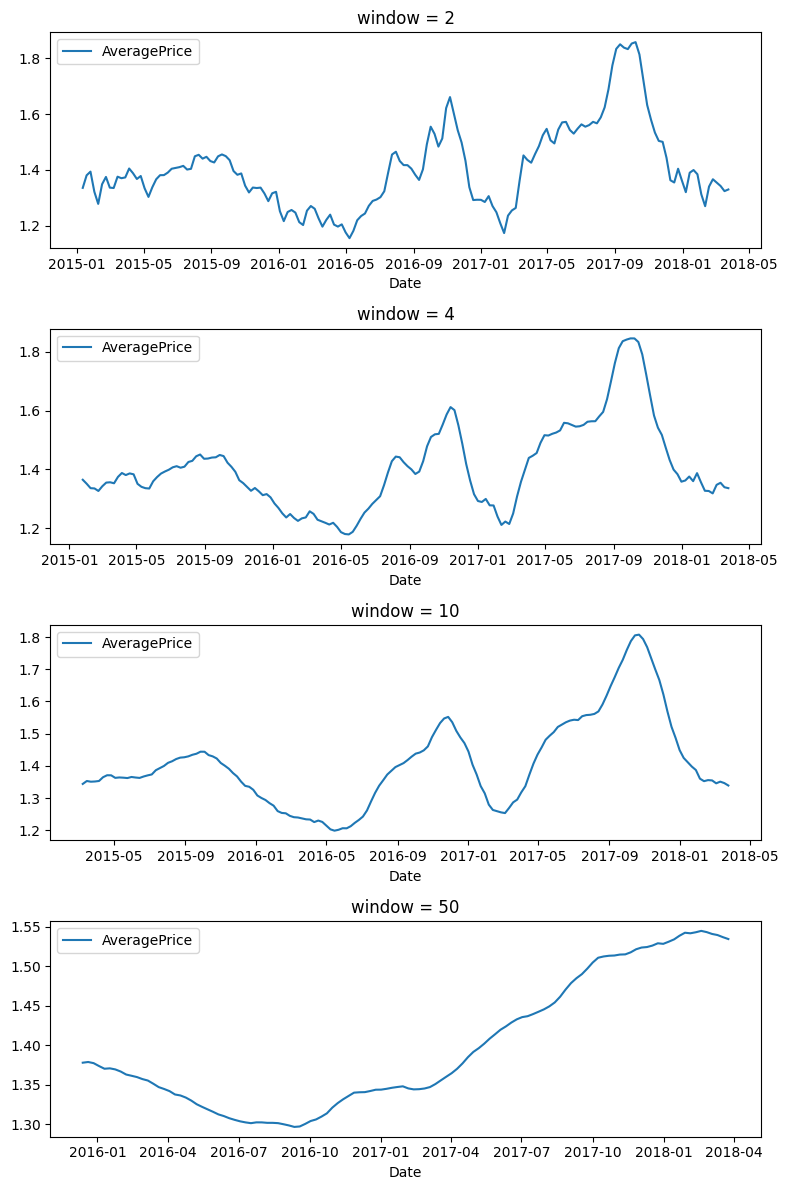

In [10]:
windows = [2, 4, 10, 50]
fig, axes = plt.subplots(4, 1, figsize=(8, 12))
for i, window in enumerate(windows):
    df = avocado_mean.rolling(window=window).mean()
    sns.lineplot(data=df, ax=axes[i])
    axes[i].set_title(f'window = {window}')
plt.tight_layout()

Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [14]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [16]:
avocado_full = pd.read_csv(r'C:\Simulation\data\6_avocado_full.csv', index_col=0, parse_dates=['Date'])

•	Date — дата  
•	AveragePrice — средняя цена одного авокадо  
•	Total Volume — количество проданных авокадо  
•	4046 — количество проданных авокадо PLU* 4046  
•	4225 — количество проданных авокадо PLU 4225  
•	4770 — количество проданных авокадо PLU 4770  
•	Total Bags — всего упаковок  
•	Small Bags — маленькие упаковки  
•	Large Bags — большие  
•	XLarge Bags — очень большие  
•	type — обычный или органический  
•	year — год  
•	Region — город или регион the city or region of the observation  
•	*PLU — код товара (Product Lookup code)  

In [19]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [17]:
avocado_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-01-04 to 2018-03-25
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [18]:
avocado_full.describe(include='all')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Southeast
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).  
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [22]:
organic_ch = avocado_full.loc[(avocado_full['type']=='organic')&(avocado_full['region']=='Chicago')]

In [24]:
organic_ch

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


In [25]:
organic_ch['AveragePrice'].rolling(window=4).mean()

Date
2015-01-04       NaN
2015-01-11       NaN
2015-01-18       NaN
2015-01-25    1.7300
2015-02-01    1.7375
               ...  
2018-02-25    1.6525
2018-03-04    1.6525
2018-03-11    1.6550
2018-03-18    1.6550
2018-03-25    1.6575
Name: AveragePrice, Length: 169, dtype: float64

In [26]:
organic_ch['AveragePrice'].ewm(span=4).mean()

Date
2015-01-04    1.490000
2015-01-11    1.677500
2015-01-18    1.745102
2015-01-25    1.784118
2015-02-01    1.669563
                ...   
2018-02-25    1.676654
2018-03-04    1.653992
2018-03-11    1.656395
2018-03-18    1.657837
2018-03-25    1.670702
Name: AveragePrice, Length: 169, dtype: float64

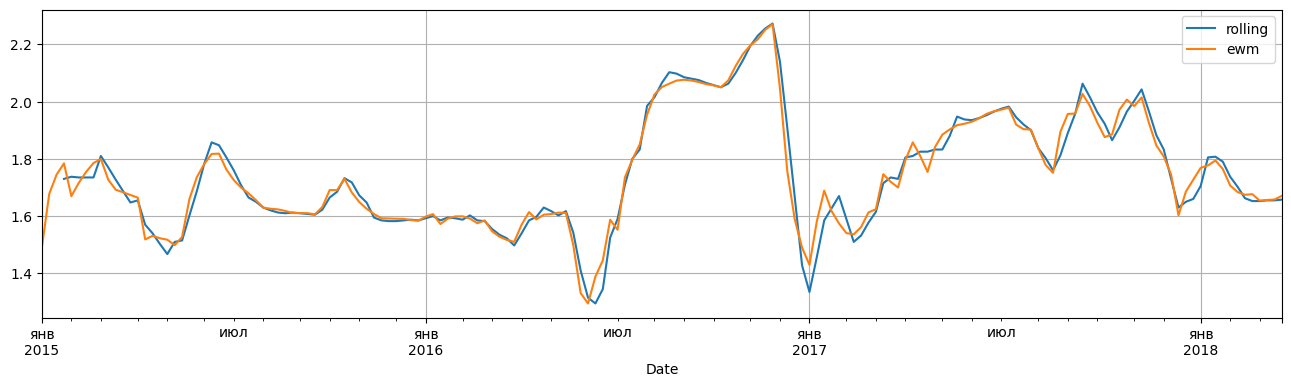

In [27]:
fig, ax = plt.subplots(figsize=(16, 4))
organic_ch.AveragePrice.rolling(window=4).mean().plot(ax=ax, label='rolling')
organic_ch.AveragePrice.ewm(span=4).mean().plot(ax=ax, label='ewm')
plt.legend()
plt.grid()

Прочитайте эти данные. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.  
Могут понадобиться:  
•	pd.to_timedelta()  
•	pd.Series.str  

In [28]:
df = pd.read_csv(r'C:\Simulation\data\6_delays.csv')

In [46]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical,days,category
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666...",1.623472,1-2 days
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]",4.093322,more than 3 days
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666...",0.256215,less than 1 day
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666...",0.986331,less than 1 day
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666...",1.556863,1-2 days


In [30]:
df['delay'] = df['delay'].str.replace('-', '')

In [32]:
df['delay'] = pd.to_timedelta(df.delay)

Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.  
Могут понадобится: pd.cut()

In [34]:
df['delay_categorical'] = pd.cut(df['delay'], bins=3)

Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:  
•	'less than 1 day' – время от 0 до 1 дня  
•	'1-2 days' – от 1 до 2 дней  
•	'2-3 days' – от 2 до 3 дней  
•	 'more than 3 days' – больше 3 дней

In [42]:
df['days'] = df['delay'].dt.total_seconds() / (24 * 3600)

In [44]:
bins = [0, 1, 2, 3, float('inf')]
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

In [45]:
df['category'] = pd.cut(df['days'], bins=bins, labels=labels, right=True, include_lowest=True)

Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки.

<Axes: xlabel='category', ylabel='count'>

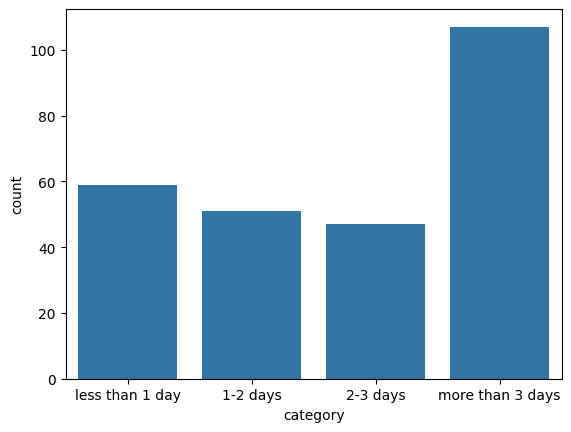

In [14]:
sns.countplot(x='category', data=df)

In [18]:
delay = df.category.value_counts()

In [19]:
px.bar(delay)